In [1]:
# Objective:
# The objective of this assignment is to apply Random Forest Classification to a given dataset, 
# analyse the performance of the model, and interpret the results.

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset

df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [5]:
df.shape

(999, 10)

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [7]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Encoding categorical variables

# Identifying categorical columns

df_categorical_only = df.select_dtypes(include=np.object)
df_categorical_only

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\419416527.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical_only = df.select_dtypes(include=np.object)


""
0
1
2
3
4
...
994
995
996
997


In [9]:
# No categorical variables

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

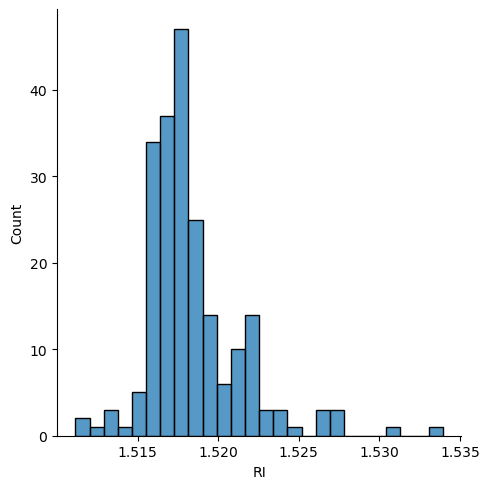

In [12]:
# Visualizations

sns.displot(df['RI'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\159333446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RI'])


<Axes: xlabel='RI', ylabel='Density'>

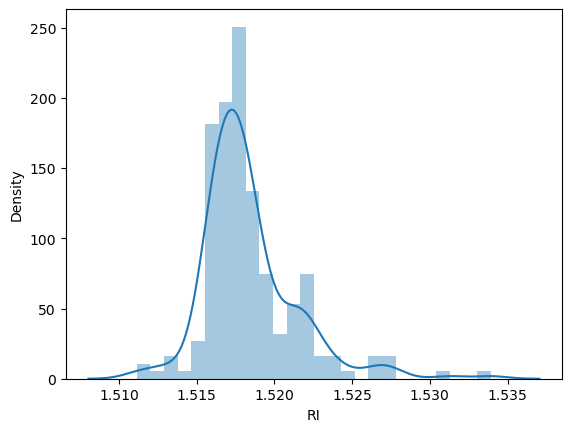

In [13]:
sns.distplot(df['RI'])

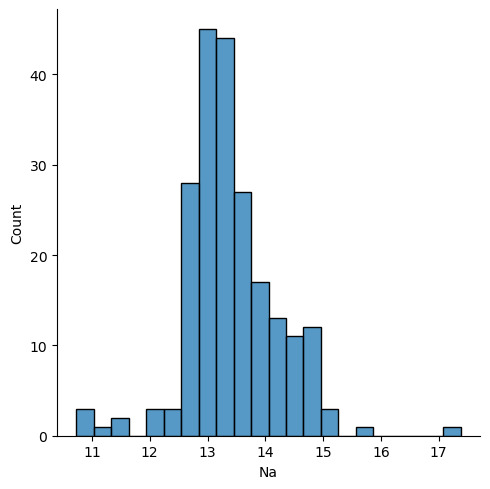

In [14]:
sns.displot(df['Na'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\4013315528.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Na'])


<Axes: xlabel='Na', ylabel='Density'>

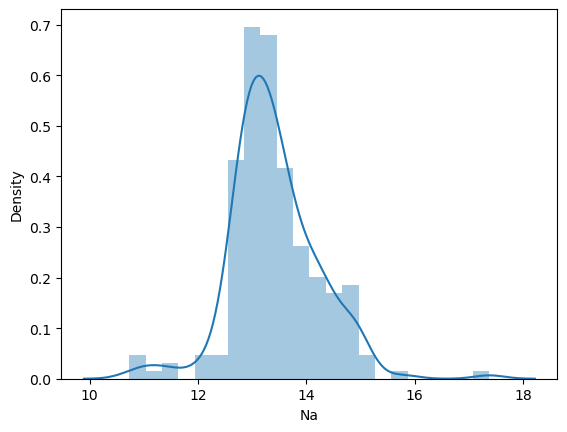

In [15]:
sns.distplot(df['Na'])

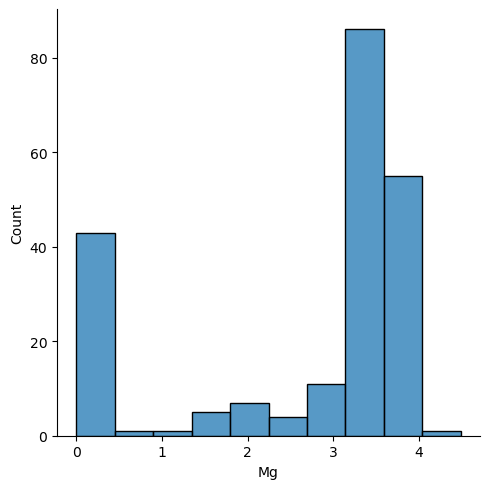

In [16]:
sns.displot(df['Mg'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\3300045037.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mg'])


<Axes: xlabel='Mg', ylabel='Density'>

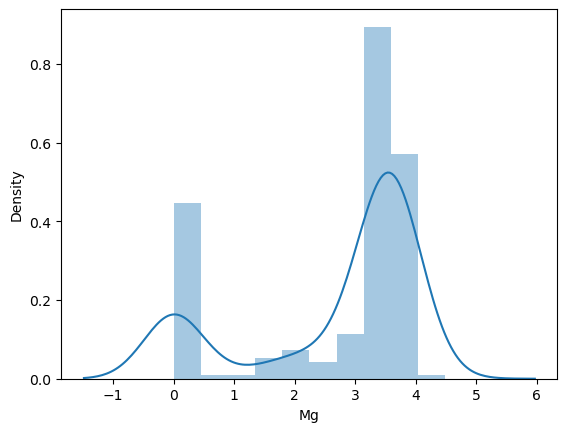

In [17]:
sns.distplot(df['Mg'])

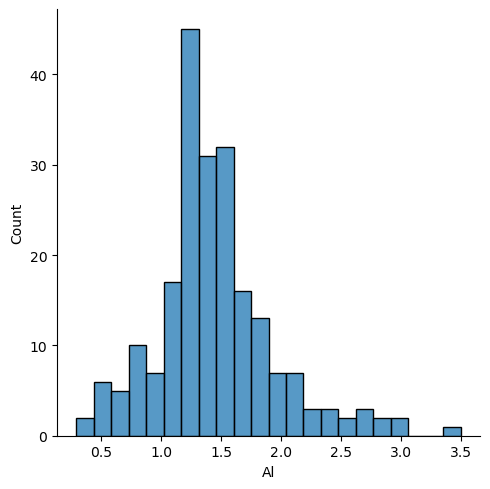

In [18]:
sns.displot(df['Al'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\1218655576.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Al'])


<Axes: xlabel='Al', ylabel='Density'>

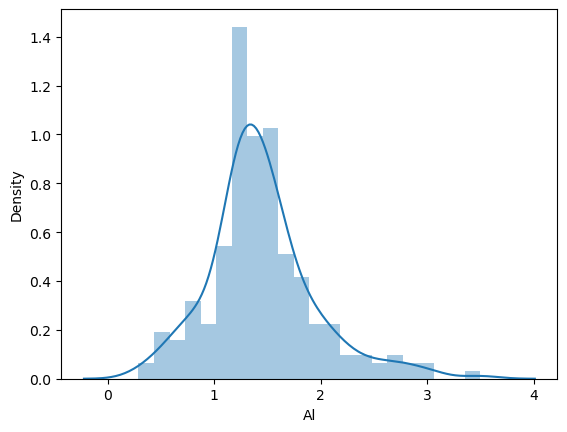

In [19]:
sns.distplot(df['Al'])

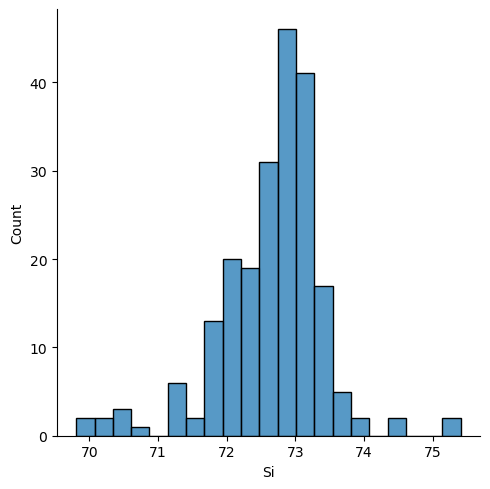

In [20]:
sns.displot(df['Si'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\39077798.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Si'])


<Axes: xlabel='Si', ylabel='Density'>

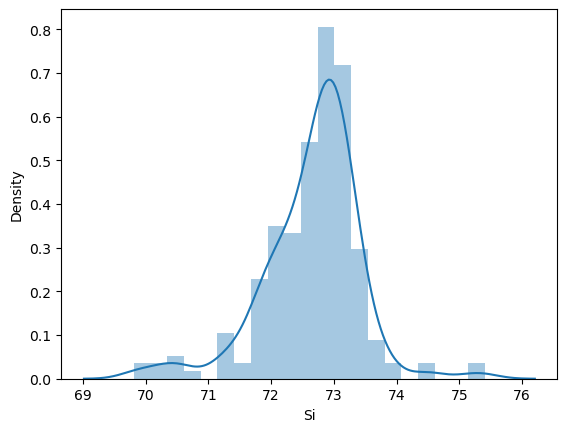

In [21]:
sns.distplot(df['Si'])

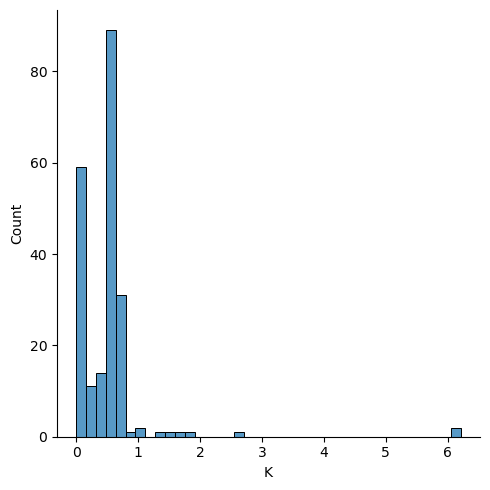

In [22]:
sns.displot(df['K'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\16865348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['K'])


<Axes: xlabel='K', ylabel='Density'>

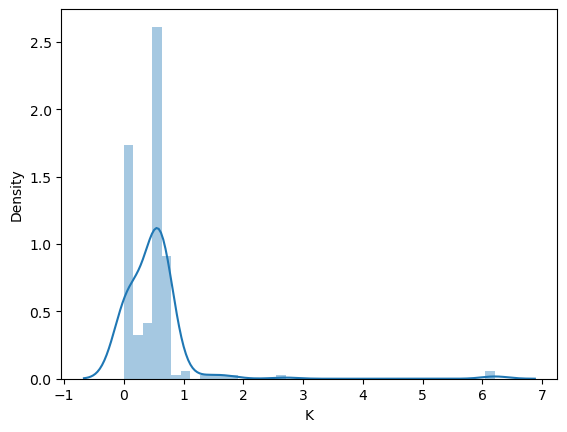

In [23]:
sns.distplot(df['K'])

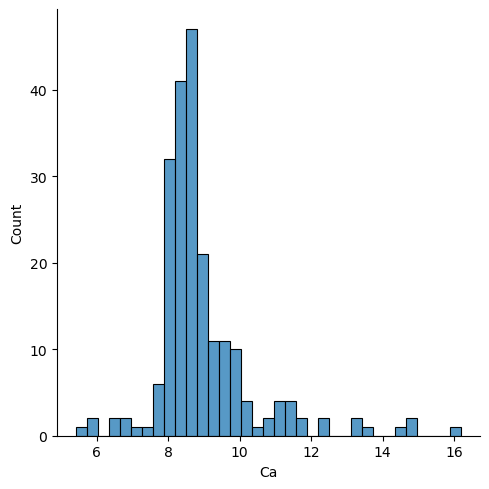

In [24]:
sns.displot(df['Ca'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\940341838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ca'])


<Axes: xlabel='Ca', ylabel='Density'>

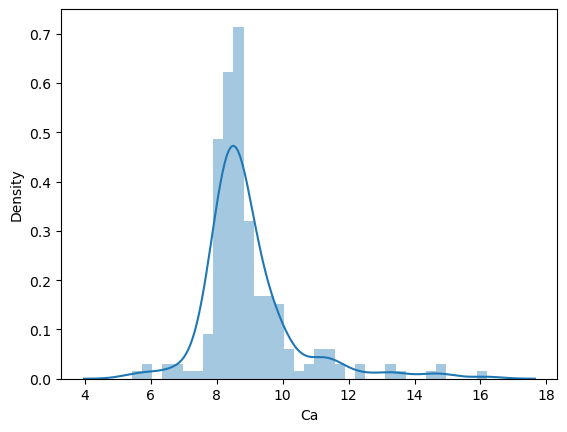

In [25]:
sns.distplot(df['Ca'])

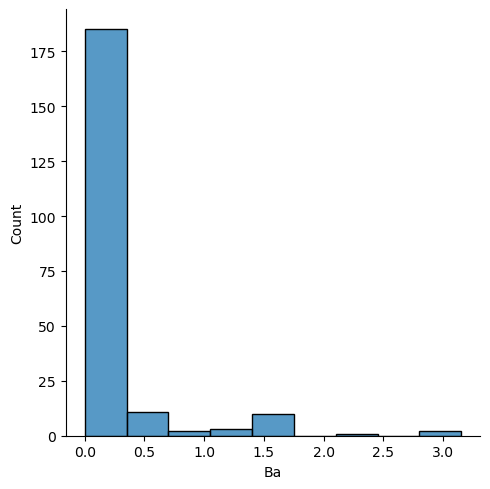

In [26]:
sns.displot(df['Ba'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\3411585791.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ba'])


<Axes: xlabel='Ba', ylabel='Density'>

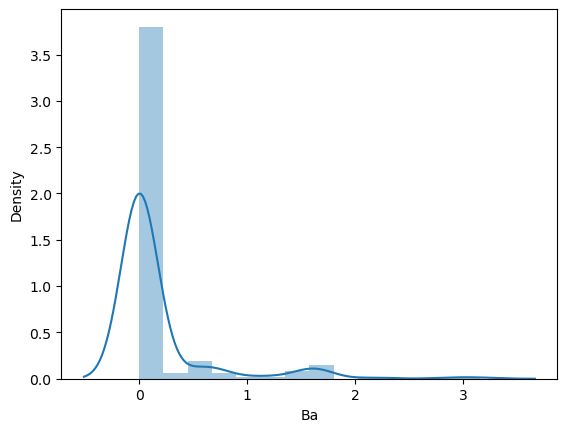

In [27]:
sns.distplot(df['Ba'])

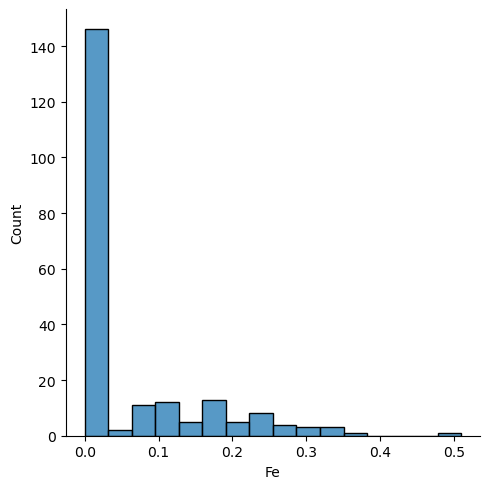

In [28]:
sns.displot(df['Fe'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\2216357191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fe'])


<Axes: xlabel='Fe', ylabel='Density'>

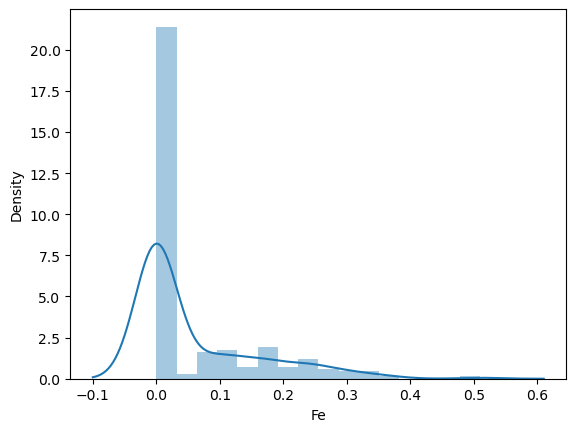

In [29]:
sns.distplot(df['Fe'])

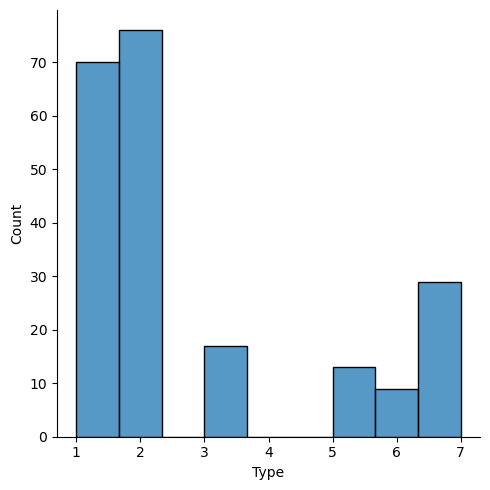

In [30]:
sns.displot(df['Type'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_11752\152538008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Type'])


<Axes: xlabel='Type', ylabel='Density'>

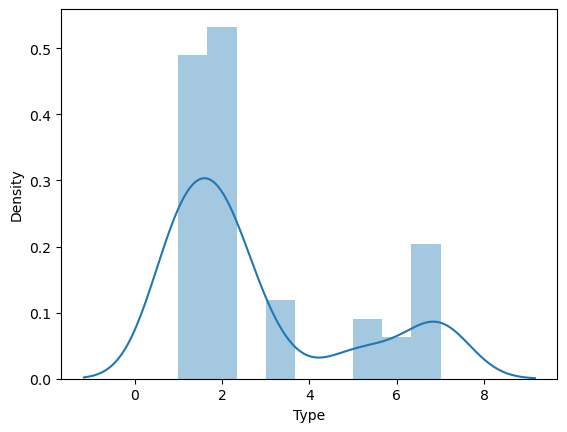

In [31]:
sns.distplot(df['Type'])

In [32]:
# Handling missing values

df.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
994,True,True,True,True,True,True,True,True,True,True
995,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True,True,True


In [33]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [34]:
# There are 785 null values in all columns

# Fill missing values using mean of those columns
df['RI'] = df['RI'].fillna(df['RI'].mean())
df['Na'] = df['Na'].fillna(df['Na'].mean())
df['Mg'] = df['Mg'].fillna(df['Mg'].mean())
df['Al'] = df['Al'].fillna(df['Al'].mean())
df['Si'] = df['Si'].fillna(df['Si'].mean())
df['K'] = df['K'].fillna(df['K'].mean())
df['Ca'] = df['Ca'].fillna(df['Ca'].mean())
df['Ba'] = df['Ba'].fillna(df['Ba'].mean())
df['Fe'] = df['Fe'].fillna(df['Fe'].mean())
df['Type'] = df['Type'].fillna(1)
df['Type'] = df['Type'].astype(int)

In [35]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.521010,13.64000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000,1
1,1.517610,13.89000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1
2,1.516180,13.53000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1
3,1.517660,13.21000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000,1
4,1.517420,13.27000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
994,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,1
995,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,1
996,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,1
997,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,1


In [36]:
df.isnull().sum()

# No null values now

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [37]:
# Standard scaling

# Identifying numerical columns

df_numerics_only = df.select_dtypes(include=np.number)

from sklearn.preprocessing import StandardScaler

for col in df_numerics_only:
    ss = StandardScaler()
    df_numerics_only[col] = ss.fit_transform(df_numerics_only[[col]])
    
df_numerics_only

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.885924e+00,6.156721e-01,2.710781e+00,-1.496095,-2.435182e+00,-1.451292e+00,-3.149438e-01,-7.624283e-01,-1.267090e+00,-0.313794
1,-5.387117e-01,1.278685e+00,1.374509e+00,-0.368298,2.210713e-01,-5.663653e-02,-1.714947e+00,-7.624283e-01,-1.267090e+00,-0.313794
2,-1.558485e+00,3.239466e-01,1.299438e+00,0.412485,9.480459e-01,-3.554912e-01,-1.791034e+00,-7.624283e-01,-1.267090e+00,-0.313794
3,-5.030553e-01,-5.247093e-01,1.509638e+00,-0.671935,-1.144554e-01,2.422182e-01,-1.121467e+00,-7.624283e-01,-1.267090e+00,-0.313794
4,-6.742061e-01,-3.655863e-01,1.404538e+00,-0.888820,1.199691e+00,1.758060e-01,-1.349729e+00,-7.624283e-01,-1.267090e+00,-0.313794
...,...,...,...,...,...,...,...,...,...,...
994,-1.583463e-13,9.421974e-15,6.667685e-16,0.000000,-3.973434e-14,-3.686615e-16,-2.703158e-15,-2.417827e-16,-3.084478e-16,-0.313794
995,-1.583463e-13,9.421974e-15,6.667685e-16,0.000000,-3.973434e-14,-3.686615e-16,-2.703158e-15,-2.417827e-16,-3.084478e-16,-0.313794
996,-1.583463e-13,9.421974e-15,6.667685e-16,0.000000,-3.973434e-14,-3.686615e-16,-2.703158e-15,-2.417827e-16,-3.084478e-16,-0.313794
997,-1.583463e-13,9.421974e-15,6.667685e-16,0.000000,-3.973434e-14,-3.686615e-16,-2.703158e-15,-2.417827e-16,-3.084478e-16,-0.313794


In [38]:
# Correlation matrix

corr = df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.131267
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.401942
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.595437
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.478615
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.121139
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.008036
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000761
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.459699
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.150481
Type,-0.131267,0.401942,-0.595437,0.478615,0.121139,-0.008036,0.000761,0.459699,-0.150481,1.000000


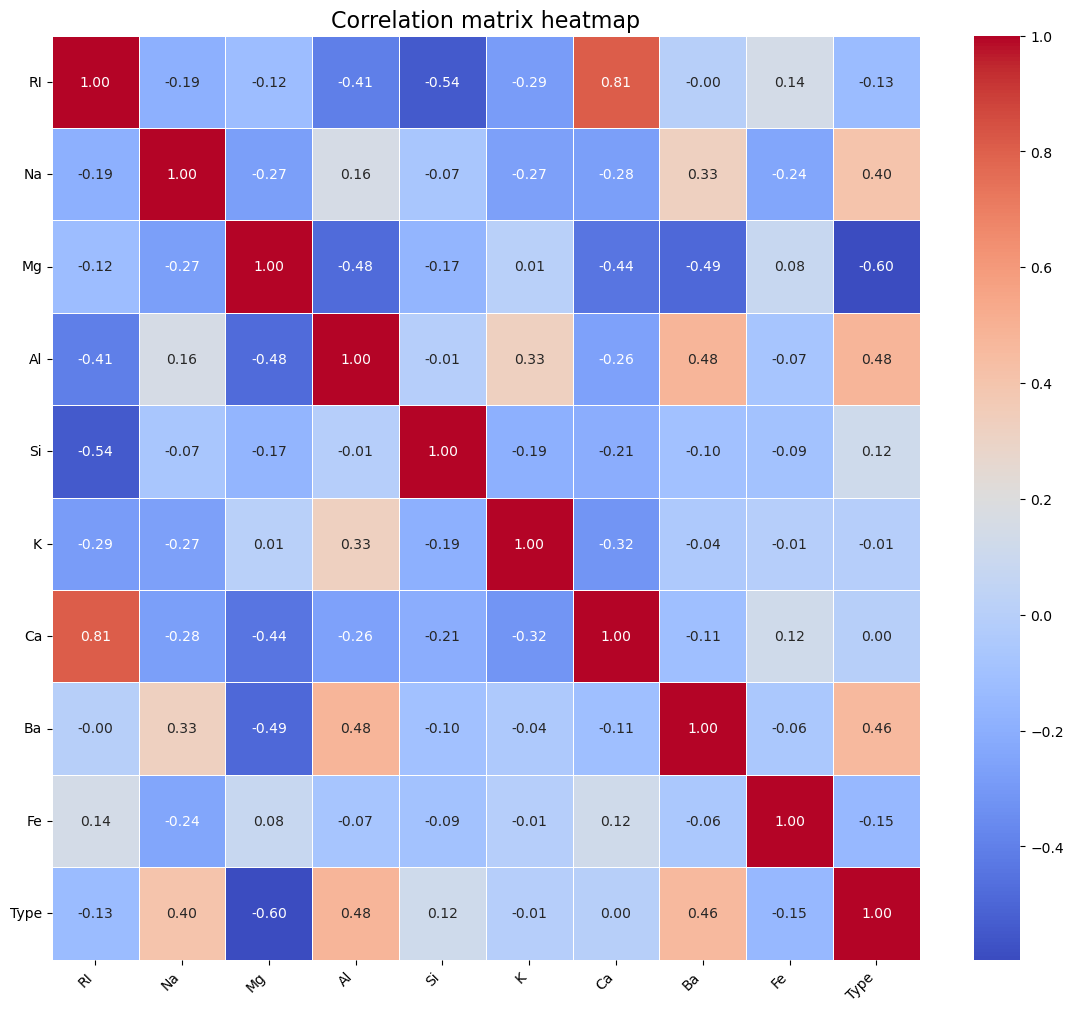

In [39]:
# Create the heatmap

plt.figure(figsize = (14,12))

sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation matrix heatmap', fontsize=16)
plt.show()

In [40]:
# Feature selection

x = df.drop('Type',axis=1)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.521010,13.64000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000
1,1.517610,13.89000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000
2,1.516180,13.53000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000
3,1.517660,13.21000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000
4,1.517420,13.27000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
994,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
995,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
996,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
997,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009


In [41]:
y = df['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
994    1
995    1
996    1
997    1
998    1
Name: Type, Length: 999, dtype: int32

In [42]:
# Split the data into training and testing datasets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [43]:
# Train the decision tree classifier

model = RandomForestClassifier(criterion = "gini", max_depth=8, min_samples_split=10, random_state=5)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [44]:
# Make the predictions

y_pred = model.predict(x_test)

In [45]:
# Evaluate the model

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')
cvalscore = cross_val_score(model,x_train,y_train,cv=10)
print(f'Cross val score:{cvalscore}')
print(f'Cross val score mean:{cvalscore.mean()}')
print('Classification Report:')
print(classification_report(y_test,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy:0.96


C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Cross val score:[0.9625     0.975      0.9        0.925      0.9625     0.95
 0.9125     0.95       0.95       0.94936709]
Cross val score mean:0.9436867088607593
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       177
           2       0.67      0.60      0.63        10
           3       0.33      0.50      0.40         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      0.88      0.93         8

    accuracy                           0.96       200
   macro avg       0.78      0.83      0.79       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
[[175   1   1   0   0   0]
 [  2   6   1   1   0   0]
 [  0   1   1   0   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0   0   1   0]
 [  0   1   0   0   0   7]]


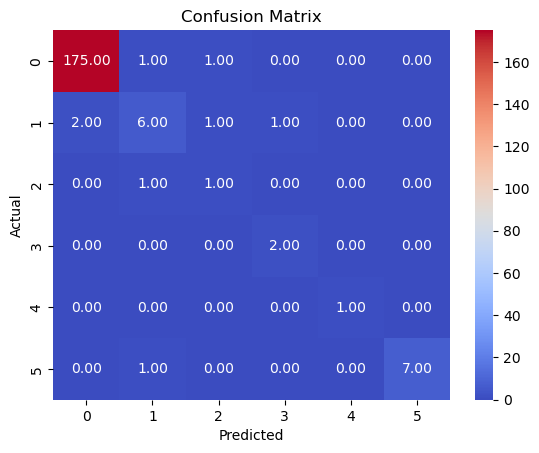

In [46]:
# Visualize the confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_dist = {"criterion":["gini","entropy"] , "max_depth":[1,2,3,4,5,6,7,8]}
grid = GridSearchCV(model, param_grid=param_dist, cv = 10, n_jobs=-1)

In [48]:
grid.fit(x_train,y_train)

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=8, min_samples_split=10,
                                              random_state=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [49]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=5)

In [50]:
grid.best_score_

0.9499367088607593

In [51]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8}

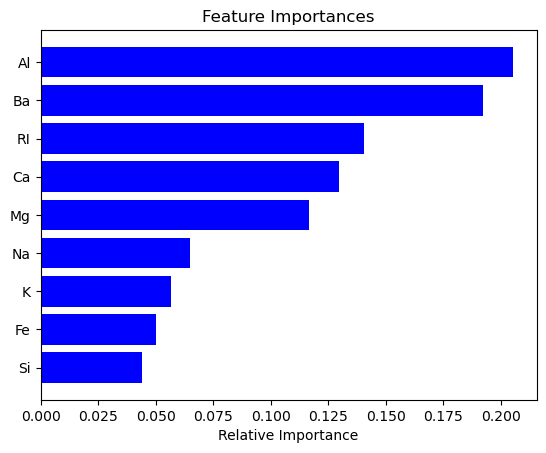

In [52]:
# Feature importances

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [59]:
# Bagging method

from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(base_estimator = RandomForestClassifier(),
                             n_estimators=10,
                             max_samples=0.8,
                             oob_score=True,
                             random_state=0)
bag_model.fit(x_train,y_train)
bag_model.oob_score_

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9386733416770964

In [60]:
bag_model.score(x_test,y_test)

0.965

In [55]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(base_estimator = RandomForestClassifier(),
                             n_estimators=10,
                             max_samples=0.8,
                             oob_score=True,
                             random_state=0)
scores = cross_val_score(bag_model,x,y,cv=5)
scores.mean()

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to comput

0.8689396984924624

In [61]:
# Boosting method

from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter=10).fit(x_train, y_train)
model.score(x_test, y_test)

0.96

In [57]:
# Additional Notes:

# 1. Explain Bagging and Boosting methods. How is it different from each other.

# Bagging
# Bootstrap Aggregating, also known as bagging, is a machine learning ensemble meta-algorithm 
# designed to improve the stability and accuracy of machine learning algorithms used in 
# statistical classification and regression. It decreases the variance and helps to avoid overfitting. 
# It is usually applied to decision tree methods. 
# Bagging is a special case of the model averaging approach.

# Boosting is an ensemble modeling technique that attempts to build a strong classifier from the 
# number of weak classifiers. It is done by building a model by using weak models in series. 
# Firstly, a model is built from the training data. Then the second model is built which tries to 
# correct the errors present in the first model. This procedure is continued and models are added 
# until either the complete training data set is predicted correctly or the maximum number of models 
# are added.

In [58]:
# 2. Explain how to handle imbalance in the data.

# Imbalanced data pertains to datasets where the distribution of observations in the target class is 
# uneven. In other words, one class label has a significantly higher number of observations, 
# while the other has a notably lower count.

# Techniques include resampling (oversampling or undersampling), synthetic data generation, 
# specialized algorithms, and alternative evaluation metrics. 
# Implementing these strategies ensures more accurate and unbiased predictions across all classes.